
=== PRIMERA FORMA: g1(x) = e^(-x) (NO CONVERGE) ===
Valor final (tras 22 iteraciones): 0.5671430289524634
f(0.5671430289524634) = 4.0974110493419147e-07
Iteración 5: valor fuera de dominio → se detiene.

=== SEGUNDA FORMA: g2(x) = -ln(x) (SÍ CONVERGE) ===
Raíz aproximada: nan
f(nan) = nan
Número de iteraciones: 4

=== ANÁLISIS DE CONVERGENCIA ===
|g1'(x)| = 0.6065 → < 1 → Converge
|g2'(x)| = 2.0000 → > 1 → No converge


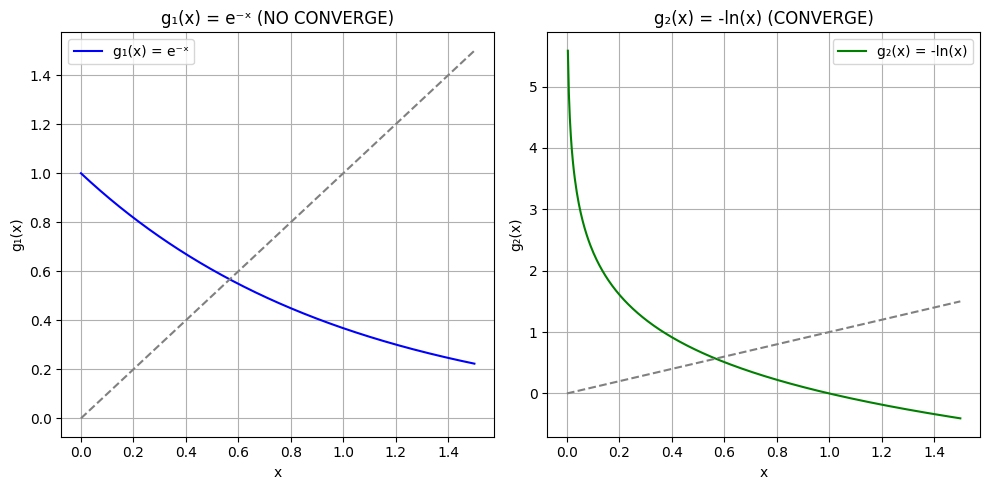


Tabla de iteraciones (método convergente):
Iter	 x_n		 g(x_n)		 |x_{n+1}-x_n|
1	 0.500000	 0.693147	 1.931472e-01
2	 0.693147	 0.366513	 3.266343e-01
3	 0.366513	 1.003722	 6.372086e-01
4	 1.003722	 -0.003715	 1.007436e+00


In [3]:
#Metodo del punto fijo
import warnings 
warnings.filterwarnings("ignore", category=RuntimeWarning)  
import numpy as np
import matplotlib.pyplot as plt


# 1. Definición de funciones
# Función original
def f(x):
    return np.exp(-x) - x

# Primer forma: No converge
def g1(x):
    return np.exp(-x)

# Segunda forma: Sí converge
def g2(x):
    return -np.log(x)

# Derivadas para el análisis de convergencia
def g1_deriv(x):
    return -np.exp(-x)

def g2_deriv(x):
    return -1/x


# 2. Método del Punto Fijo
def punto_fijo(g, x0, tol=1e-6, max_iter=100):
    iteraciones = []
    for i in range(max_iter):
        x1 = g(x0)
        if np.isnan(x1) or np.isinf(x1):  # si g(x) no es válido, detener
            print(f"Iteración {i+1}: valor fuera de dominio → se detiene.")
            break
        iteraciones.append((i + 1, x0, x1, abs(x1 - x0)))
        if abs(x1 - x0) < tol:
            return x1, i + 1, iteraciones
        x0 = x1
    return x1, len(iteraciones), iteraciones


# 3. Aplicación del método
x_inicial = 0.5
tolerancia = 1e-6

# Caso 1: g1(x) = e^(-x)
raiz1, iter1, datos1 = punto_fijo(g1, x_inicial, tolerancia)
print("\n=== PRIMERA FORMA: g1(x) = e^(-x) (NO CONVERGE) ===")
print(f"Valor final (tras {iter1} iteraciones): {raiz1}")
print(f"f({raiz1}) = {f(raiz1)}")

# Caso 2: g2(x) = -ln(x)
raiz2, iter2, datos2 = punto_fijo(g2, x_inicial, tolerancia)
print("\n=== SEGUNDA FORMA: g2(x) = -ln(x) (SÍ CONVERGE) ===")
print(f"Raíz aproximada: {raiz2}")
print(f"f({raiz2}) = {f(raiz2)}")
print(f"Número de iteraciones: {iter2}")


# 4. Análisis de convergencia
x_test = 0.5
print("\n=== ANÁLISIS DE CONVERGENCIA ===")
print(f"|g1'(x)| = {abs(g1_deriv(x_test)):.4f} → {'< 1 → Converge' if abs(g1_deriv(x_test)) < 1 else '> 1 → No converge'}")
print(f"|g2'(x)| = {abs(g2_deriv(x_test)):.4f} → {'< 1 → Converge' if abs(g2_deriv(x_test)) < 1 else '> 1 → No converge'}")

# 5. Gráficas para visualizar convergencia
x_vals = np.linspace(0, 1.5, 400)
plt.figure(figsize=(10, 5))

# Gráfica g1(x)
plt.subplot(1, 2, 1)
plt.plot(x_vals, g1(x_vals), label="g₁(x) = e⁻ˣ", color='blue')
plt.plot(x_vals, x_vals, '--', color='gray')
plt.title("g₁(x) = e⁻ˣ (NO CONVERGE)")
plt.xlabel("x")
plt.ylabel("g₁(x)")
plt.legend()
plt.grid(True)

# Gráfica g2(x)
plt.subplot(1, 2, 2)
plt.plot(x_vals, g2(x_vals), label="g₂(x) = -ln(x)", color='green')
plt.plot(x_vals, x_vals, '--', color='gray')
plt.title("g₂(x) = -ln(x) (CONVERGE)")
plt.xlabel("x")
plt.ylabel("g₂(x)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 6. Mostrar tabla de iteraciones del caso convergente
print("\nTabla de iteraciones (método convergente):")
print("Iter\t x_n\t\t g(x_n)\t\t |x_{n+1}-x_n|")
for i, x0, x1, error in datos2:
    print(f"{i}\t {x0:.6f}\t {x1:.6f}\t {error:.6e}")
